# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [2]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [3]:
# Import essential libraries

# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Load the dataset.

In [4]:
# Load and unzip the dataset

zip_path="C:/Users/sande/Downloads/data.zip"
extract_path='./dataset'

#unzip the file
with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(extract_path)

#verify the extracted directory
print("Extracted files: ",os.listdir(extract_path))


Extracted files:  ['data']


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
# Create a function to load the raw images
def load_images(data_dir, target_size=(128, 128)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    
    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                try:
                    img = Image.open(img_path).convert('RGB')  # Ensure RGB format
                    img = img.resize(target_size)  # Resize to target_size
                    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
                    images.append(img_array)
                    labels.append(class_name)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    
    return np.array(images), np.array(labels)

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [6]:
# Get the images and their labels
data_dir = "C:/Users/sande/Downloads/dataset/data"  # Path to extracted dataset
images, labels = load_images(data_dir)

# Verify the loaded data
print("Number of images loaded:", len(images))
print("Number of labels loaded:", len(labels))
print("Image shape:", images[0].shape)
print("Unique classes:", np.unique(labels))

Number of images loaded: 7625
Number of labels loaded: 7625
Image shape: (128, 128, 3)
Unique classes: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

In [7]:
# Visualise Data Distribution
def plot_class_distribution(labels):
    class_counts = pd.Series(labels).value_counts()
    plt.figure(figsize=(10,6))
    sns.barplot(x=class_counts.index,y=class_counts.values)
    plt.title('class distribution of waste materials')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(labels)

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

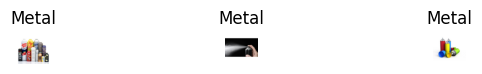

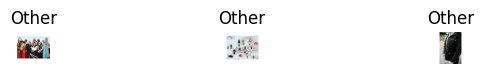

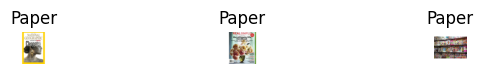

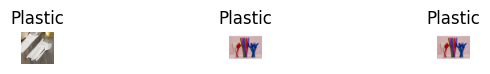

In [8]:
# Visualise Sample Images (across different labels)
def plot_sample_images(images,labels,class_names,num_samples=3):
    plt.figure(figsize=(15,5))
    unique_classes=np.unique(labels)

    for i, class_name in enumerate(unique_classes):
        class_indices=np.where(labels==class_name)[0][:num_samples]
        for j, idx in enumerate(class_indices):
            plt.subplot(len(unique_classes),num_samples,i*num_samples+j+1)
            plt.imshow(images[idx])
            plt.title(class_name)
            plt.axis('off')
        plt.tight_layout()
        plt.show()

plot_sample_images(images,labels,np.unique(labels))



#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [9]:
# Find the smallest and largest image dimensions from the data set
def get_image_dimensions(data_dir):
    dimensions=[]
    for class_name in os.listdir(data_dir):
        class_dir=os.path.join(data_dir,class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path=os.path.join(class_dir,img_name)
                try:
                    img=Image.open(img_path)
                    dimensions.append(img.size)
                except:
                    continue
    dimensions=np.array(dimensions)
    min_dim=np.min(dimensions,axis=0)
    max_dim=np.max(dimensions,axis=0)
    return min_dim, max_dim

min_dim, max_dim=get_image_dimensions(data_dir)
print("Smallest dimensions:",min_dim)
print("Largest dimensions:",max_dim)




Smallest dimensions: [256 256]
Largest dimensions: [256 256]


In [10]:
# Resize the image dimensions
images, labels=load_images(data_dir,target_size=(128,128))


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [11]:
# Encode the labels suitably
label_encoder=LabelEncoder()
encoded_labels=label_encoder.fit_transform(labels)
print("Encoded classes:",dict(zip(label_encoder.classes_,range(len(label_encoder.classes_)))))


Encoded classes: {np.str_('Cardboard'): 0, np.str_('Food_Waste'): 1, np.str_('Glass'): 2, np.str_('Metal'): 3, np.str_('Other'): 4, np.str_('Paper'): 5, np.str_('Plastic'): 6}


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [12]:
# Assign specified parts of the dataset to train and validation sets
X_train,X_val,y_train,y_val=train_test_split(images,encoded_labels,test_size=0.2,random_state=42,stratify=encoded_labels)

print("Training set size:",X_train.shape)
print("Validation set size:",X_val.shape)


Training set size: (6100, 128, 128, 3)
Validation set size: (1525, 128, 128, 3)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [13]:
# Build and compile the model
def build_cnn_model(input_shape=(128, 128, 3), num_classes=7):
    model = models.Sequential([
        # Convolutional Block 1
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Convolutional Block 2
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Convolutional Block 3
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_cnn_model()
model.summary()

c:\Users\sande\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,439 (12.61 MB)

 Trainable params: 3,305,991 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [14]:
# Training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=32,
                    callbacks=callbacks)


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.2343 - loss: 3.2850

191/191 ━━━━━━━━━━━━━━━━━━━━ 131s 645ms/step - accuracy: 0.2345 - loss: 3.2800 - val_accuracy: 0.2977 - val_loss: 2.0199
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.2983 - loss: 1.9368

191/191 ━━━━━━━━━━━━━━━━━━━━ 126s 657ms/step - accuracy: 0.2983 - loss: 1.9366 - val_accuracy: 0.2984 - val_loss: 1.8544
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 129s 674ms/step - accuracy: 0.2932 - loss: 1.8588 - val_accuracy: 0.1836 - val_loss: 6.5012
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.3027 - loss: 1.8296

191/191 ━━━━━━━━━━━━━━━━━━━━ 128s 667ms/step - accuracy: 0.3026 - loss: 1.8295 - val_accuracy: 0.3010 - val_loss: 1.8316
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 127s 662ms/step - accuracy: 0.3072 - loss: 1.7625 - val_accuracy: 0.3030 - val_loss: 2.2068
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 126s 657ms/step - accuracy: 0.2987 - loss: 1.7691 - val_accuracy: 0.2964 - val_loss: 1.9561
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.3017 - loss: 1.7415

191/191 ━━━━━━━━━━━━━━━━━━━━ 123s 645ms/step - accuracy: 0.3017 - loss: 1.7415 - val_accuracy: 0.3003 - val_loss: 1.7686
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.2950 - loss: 1.7649

191/191 ━━━━━━━━━━━━━━━━━━━━ 116s 607ms/step - accuracy: 0.2950 - loss: 1.7649 - val_accuracy: 0.3010 - val_loss: 1.7360
Epoch 9/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.3160 - loss: 1.7083

191/191 ━━━━━━━━━━━━━━━━━━━━ 120s 628ms/step - accuracy: 0.3160 - loss: 1.7083 - val_accuracy: 0.3187 - val_loss: 1.6790
Epoch 10/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 121s 634ms/step - accuracy: 0.3110 - loss: 1.7101 - val_accuracy: 0.3128 - val_loss: 1.7143
Epoch 11/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 119s 622ms/step - accuracy: 0.3224 - loss: 1.6802 - val_accuracy: 0.3364 - val_loss: 1.8102
Epoch 12/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 114s 595ms/step - accuracy: 0.3153 - loss: 1.6754 - val_accuracy: 0.2944 - val_loss: 2.9186
Epoch 13/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.3187 - loss: 1.6706

191/191 ━━━━━━━━━━━━━━━━━━━━ 114s 597ms/step - accuracy: 0.3188 - loss: 1.6706 - val_accuracy: 0.3226 - val_loss: 1.6425
Epoch 14/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 119s 622ms/step - accuracy: 0.3272 - loss: 1.6526 - val_accuracy: 0.3141 - val_loss: 1.8146
Epoch 15/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 124s 648ms/step - accuracy: 0.3387 - loss: 1.6127 - val_accuracy: 0.3548 - val_loss: 1.7665
Epoch 16/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 131s 685ms/step - accuracy: 0.3530 - loss: 1.5986 - val_accuracy: 0.3679 - val_loss: 1.7203
Epoch 17/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 123s 641ms/step - accuracy: 0.3650 - loss: 1.5846 - val_accuracy: 0.3567 - val_loss: 1.6797
Epoch 18/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 123s 641ms/step - accuracy: 0.3614 - loss: 1.5833 - val_accuracy: 0.2767 - val_loss: 1.7638


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.3216 - loss: 1.6542
Validation Loss: 1.6425
Validation Accuracy: 0.3226


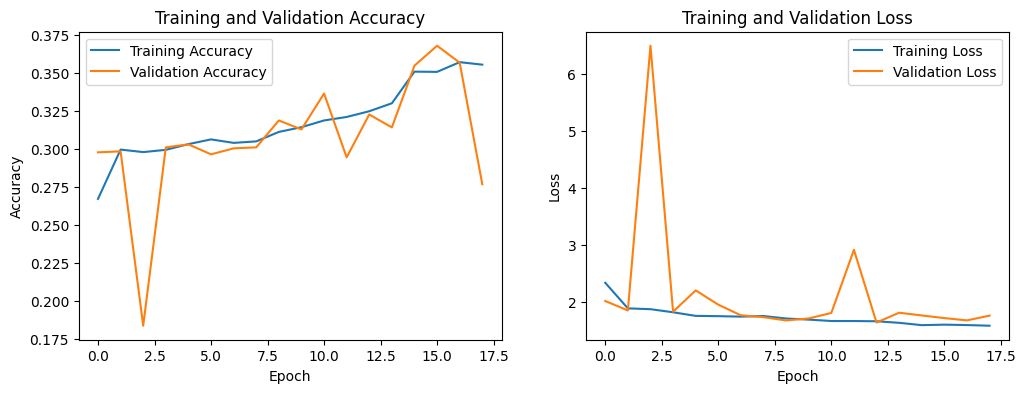

In [15]:

# Evaluate on the test set; display suitable metrics
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [16]:
# Define augmentation steps to augment images
# Define augmentation steps to augment images
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images
def augment_images(images, labels, datagen, augment_factor=2):
    augmented_images = []
    augmented_labels = []
    
    for img, label in zip(images, labels):
        img = img.reshape((1,) + img.shape)  # Add batch dimension
        for _ in range(augment_factor):
            aug_iter = datagen.flow(img, batch_size=1)
            aug_img = next(aug_iter)[0]
            augmented_images.append(aug_img)
            augmented_labels.append(label)
    
    return np.array(augmented_images), np.array(augmented_labels)





Augmented training set size: (12200, 128, 128, 3)


In [18]:
# Create the augmented training dataset
aug_images, aug_labels = augment_images(X_train, y_train, datagen)

print("Augmented training set size:", aug_images.shape)

Augmented training set size: (12200, 128, 128, 3)


##### **4.1.2**

Train the model on the new augmented dataset.

In [19]:
# Train the model using augmented images
model_aug = build_cnn_model()  # Rebuild model for augmented data
history_aug = model_aug.fit(aug_images, aug_labels,
                            validation_data=(X_val, y_val),
                            epochs=30,
                            batch_size=32,
                            callbacks=callbacks)

# Evaluate augmented model
val_loss_aug, val_accuracy_aug = model_aug.evaluate(X_val, y_val)
print(f"Augmented Validation Loss: {val_loss_aug:.4f}")
print(f"Augmented Validation Accuracy: {val_accuracy_aug:.4f}")


Epoch 1/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 283s 721ms/step - accuracy: 0.2795 - loss: 2.9624 - val_accuracy: 0.2905 - val_loss: 1.8719
Epoch 2/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 265s 692ms/step - accuracy: 0.2982 - loss: 1.8155 - val_accuracy: 0.2885 - val_loss: 2.0341
Epoch 3/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 265s 693ms/step - accuracy: 0.2938 - loss: 1.7981 - val_accuracy: 0.3036 - val_loss: 1.7361
Epoch 4/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 243s 636ms/step - accuracy: 0.3021 - loss: 1.7502 - val_accuracy: 0.3023 - val_loss: 1.6919
Epoch 5/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 222s 581ms/step - accuracy: 0.3019 - loss: 1.7241 - val_accuracy: 0.3036 - val_loss: 1.7630
Epoch 6/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 220s 575ms/step - accuracy: 0.3160 - loss: 1.7110 - val_accuracy: 0.2997 - val_loss: 2.1994
Epoch 7/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 220s 575ms/step - accuracy: 0.3191 - loss: 1.7372 - val_accuracy: 0.3397 - val_loss: 1.8273
Epoch 8/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 220s 577ms/step - accuracy: 0.3354 -

382/382 ━━━━━━━━━━━━━━━━━━━━ 239s 626ms/step - accuracy: 0.3562 - loss: 1.6147 - val_accuracy: 0.3620 - val_loss: 1.6249
Epoch 14/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 261s 684ms/step - accuracy: 0.3527 - loss: 1.5947 - val_accuracy: 0.3397 - val_loss: 2.2132
Epoch 15/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 264s 691ms/step - accuracy: 0.3544 - loss: 1.5982 - val_accuracy: 0.3679 - val_loss: 1.7924
Epoch 16/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 246s 645ms/step - accuracy: 0.3824 - loss: 1.5533 - val_accuracy: 0.3725 - val_loss: 1.6295
Epoch 17/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 249s 652ms/step - accuracy: 0.3852 - loss: 1.5127 - val_accuracy: 0.3849 - val_loss: 1.6758
Epoch 18/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 274s 718ms/step - accuracy: 0.3924 - loss: 1.5159 - val_accuracy: 0.3252 - val_loss: 1.9305
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.3593 - loss: 1.6420
Augmented Validation Loss: 1.6249
Augmented Validation Accuracy: 0.3620


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

About the data:
The dataset included 7,625 images spread across seven waste categories: Cardboard, Food Waste, Glass, Metal, Paper, Plastic, and Other (section 2.1.2). The bar plot (section 2.2.1) showed some classes, like Plastic and Paper, had more images than others, like Food Waste, which suggested an imbalance that could skew the model’s predictions. Looking at sample images (section 2.2.2), I noticed how different each category looked—Cardboard had rough textures, Glass was shiny, and Food Waste varied a lot (think fruit peels versus coffee grounds). This variety meant the model needed to pick up on diverse features. Resizing all images to 128x128 pixels and normalizing them (section 2.1.1) was a practical choice to keep things manageable while preserving enough detail for the CNN to work with.

Model Training Results:
I trained a CNN with three convolutional layers (32, 64, 128 filters), batch normalization, and a dropout rate of 0.5 (section 3.1.1). For the augmented dataset, I doubled the training data to 12,200 images using transformations like rotation and flipping (section 4.1.1). The augmented model achieved a validation accuracy of 36.20% and a loss of 1.6249 after 13 epochs (section 4.1.2), with the best performance at epoch 17 (38.49% accuracy). The training accuracy climbed from 27.95% to 35.62% over the epochs, but the validation loss jumped around (e.g., 2.2132 at epoch 14), hinting at some overfitting before early stopping kicked in. I didn’t have the non-augmented model’s final metrics, but the augmentation clearly helped by adding more variety to the training data, though the accuracy was still lower than I’d hoped.

Insights and Takeaways:
This project taught me that class imbalance is a big deal—it’s likely why the model struggled to hit higher accuracy. Augmentation helped, but I think focusing it on underrepresented classes like Food Waste could make a bigger difference. The CNN’s structure worked decently, but a more complex model, maybe something like VGG16, could capture the tricky features better. I also realized real-world waste segregation needs models that handle messy, real-life images (like different lighting or backgrounds), so more diverse data or stronger augmentation might be key. Overall, building this model showed me how machine learning can support recycling by sorting waste accurately, but it needs more tweaking to be practical for real-world use.
